# NAME: Manoj Kumar Singh
## Batch: 23 April 2023

### After Phase-3: creation of initial dataset:
#### I am using dataset "df_cement.csv"
### After Phase-4: Exploratory Data Analysis:
#### Top feature I am going to use as Additive Catalyst (gm)', 'Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)', 'Formulation Duration (hrs)'.
### After Phase-5: Feature Engineering and Predictive Modelling:
#### I am going to use as RandomForestRegressor for best R2 score.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [44]:
cement_data = pd.read_csv('df_cement.csv')

In [45]:
cement_data.head()

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,486.42,0.076266,-1.185002,201.66,0.017638,1151.17,708.50,1.330671,79.89
1,133.32,0.567247,0.940023,175.99,-0.912828,1090.57,1010.25,-1.517225,59.80
2,559.97,-1.797172,0.164717,295.23,-0.340220,1024.93,810.69,0.660953,77.86
3,391.43,1.055950,-0.276775,299.14,0.246552,1134.88,881.34,0.453954,71.74
4,394.78,1.063836,1.023182,235.54,0.091225,1098.24,781.01,0.857185,76.07


In [46]:
cement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material Quantity (gm)      6030 non-null   float64
 1   Additive Catalyst (gm)      6030 non-null   float64
 2   Ash Component (gm)          6030 non-null   float64
 3   Water Mix (ml)              6030 non-null   float64
 4   Plasticizer (gm)            6030 non-null   float64
 5   Moderate Aggregator         6030 non-null   float64
 6   Refined Aggregator          6030 non-null   float64
 7   Formulation Duration (hrs)  6030 non-null   float64
 8   Compression Strength MPa    6030 non-null   float64
dtypes: float64(9)
memory usage: 424.1 KB


In [47]:
cement_data.isnull().sum()

Material Quantity (gm)        0
Additive Catalyst (gm)        0
Ash Component (gm)            0
Water Mix (ml)                0
Plasticizer (gm)              0
Moderate Aggregator           0
Refined Aggregator            0
Formulation Duration (hrs)    0
Compression Strength MPa      0
dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

['Additive Catalyst (gm)', 'Ash Component (gm)', 'Water Mix (ml)',
       'Plasticizer (gm)', 'Formulation Duration (hrs)'],

In [49]:
columns_to_select = ['Additive Catalyst (gm)', 'Ash Component (gm)', 'Water Mix (ml)',
                     'Plasticizer (gm)','Formulation Duration (hrs)','Compression Strength MPa']
df = cement_data[columns_to_select]

In [50]:
df.head()

,Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Formulation Duration (hrs),Compression Strength MPa
0,0.076266,-1.185002,201.66,0.017638,1.330671,79.89
1,0.567247,0.940023,175.99,-0.912828,-1.517225,59.80
2,-1.797172,0.164717,295.23,-0.340220,0.660953,77.86
3,1.055950,-0.276775,299.14,0.246552,0.453954,71.74
4,1.063836,1.023182,235.54,0.091225,0.857185,76.07


In [51]:
X = df.iloc[:,:-1]

In [52]:
y = df.iloc[:,-1]

In [53]:
X.shape

(6030, 5)

In [54]:
y

0       79.89
1       59.80
2       77.86
3       71.74
4       76.07
        ...  
6025    50.61
6026    54.24
6027    56.57
6028    58.21
6029    58.96
Name: Compression Strength MPa, Length: 6030, dtype: float64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape

(4824, 5)

In [57]:
X_test.shape

(1206, 5)

In [58]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler


In [59]:
#scaler = MinMaxScaler()
scaler = StandardScaler()

In [60]:
df.head(5)

,Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Formulation Duration (hrs),Compression Strength MPa
0,0.076266,-1.185002,201.66,0.017638,1.330671,79.89
1,0.567247,0.940023,175.99,-0.912828,-1.517225,59.80
2,-1.797172,0.164717,295.23,-0.340220,0.660953,77.86
3,1.055950,-0.276775,299.14,0.246552,0.453954,71.74
4,1.063836,1.023182,235.54,0.091225,0.857185,76.07


In [61]:
X_train = scaler.fit_transform(X_train)

In [62]:
X_test = scaler.transform(X_test)

In [63]:
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [64]:
X_train

array([[ 0.23501371, -1.87085549,  0.57652507, -1.84921849, -1.23975785],
       [ 0.03051365, -1.87085549,  0.57652507, -1.84921849, -1.74417235],
       [ 1.1705148 , -0.95930818,  0.29071851,  1.30274722,  0.12969426],
       ...,
       [-1.90693716, -1.87085549, -1.23583045,  1.31077497, -1.64674045],
       [ 0.89885482, -0.888016  , -1.03213007, -0.1634752 , -0.12653788],
       [-1.90693716, -1.87085549,  0.2387099 , -1.84921849, -0.43951744]])

In [65]:
X_test

array([[-0.16093501, -0.05697274,  0.18212646, -1.38494222,  1.43485165],
       [-0.73051868, -0.24772375, -0.76365971,  1.15369501,  1.48151011],
       [-0.58079471, -1.87085549,  1.29621826, -1.84921849, -0.43951744],
       ...,
       [-1.24145128,  0.53754382,  1.46645014,  0.7167448 ,  1.37371012],
       [-0.16379044, -0.76445503,  0.5712279 , -0.45563035,  0.81743192],
       [-1.90693716, -1.87085549,  0.38558606, -1.84921849, -0.43951744]])

#### RandomForest is best model selected from 'Feature engineering and model selection' with param 'n_estimators=150'.

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression  # For generating sample data (replace with your dataset)

# Generating sample data (replace this with your actual data)
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# Splitting the data into training and testing sets (replace with your data split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [150],  # Number of trees in the forest
    'max_depth': [None],  # Maximum depth of the trees
    'min_samples_split': [2],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1]  # Minimum number of samples required at each leaf node
}

# Initialize Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R2 Score: {r2score:.2f}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error (MSE): 284.75
R2 Score: 0.92


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a new RandomForestRegressor instance with the best parameters
RFR_model = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42)

# Train the model on the training data
RFR_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RFR_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2score:.6f}")


Mean Squared Error (MSE): 284.75
R2 Score: 0.922886


In [68]:
reg_predict = RFR_model.predict(X_test)

In [69]:
reg_predict

array([-4.77068341e+01, -6.53228426e+01,  7.24049505e+01, -1.07470382e+01,
        7.56444213e+01,  1.52162152e+01, -1.80161507e+01, -5.98277141e+01,
        5.12160255e+01, -9.79600818e+01,  4.72770069e+01, -1.22257639e+02,
        7.84974434e+01,  2.94230826e+01,  1.25298642e+01, -6.86350702e+00,
        2.04827535e+01,  9.25023705e+00,  6.63036793e+01, -2.60007991e+01,
        7.32268241e+01, -1.01836589e+01, -2.60353777e+01,  1.45389914e+01,
       -8.30160825e+01,  5.96012277e+01,  2.67077525e+01, -3.51909154e+01,
        8.68338105e+01,  2.91282818e+01,  4.41560934e+01,  1.77624732e+00,
       -1.09397650e+01,  2.95153873e+01, -3.54862286e+01,  4.14981600e+01,
       -9.39217975e+00, -2.64305253e+00, -3.76810488e+01, -5.13935214e+01,
        3.68561100e+01, -5.58712759e+01,  5.99878664e+01, -1.96807487e+01,
        7.67487497e+01,  7.39029000e+01,  3.43063098e+01, -5.53798032e+01,
       -7.68500339e+01, -5.05914593e+01,  7.10945280e+01,  6.66113531e+01,
        1.20215755e+01, -

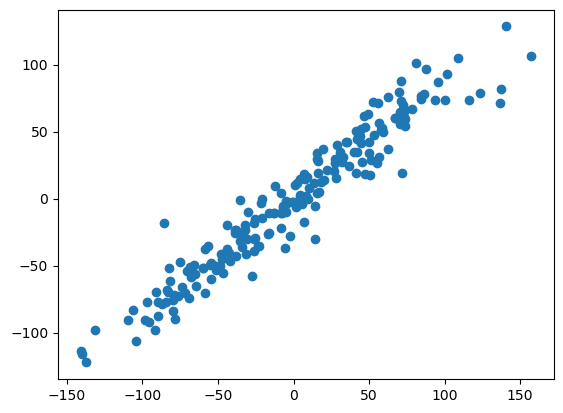

In [70]:
plt.scatter(y_test, reg_predict)

In [71]:
#Graph indicates in a linearity that shows my Model is performing well.

In [72]:
residuals = y_test - reg_predict

In [73]:
residuals

array([-6.98539446e+00,  9.61662731e-01, -1.95254494e+01, -5.36439524e+00,
       -1.29669461e+01,  1.27176552e+01, -8.41561000e+00,  5.29729289e+00,
        6.41857808e+00, -3.34828210e+01,  5.91778147e+00, -1.48515894e+01,
        4.52319654e+01, -1.35848323e+01,  5.41845987e+00,  1.15688475e-02,
        6.13862156e+00, -2.17377384e+01,  7.54972673e+00, -8.92724820e+00,
        2.01317663e+01,  5.02679480e+00,  9.32588379e+00, -1.01075230e+01,
       -2.35660914e+01,  1.39022055e+01,  2.82629824e+01,  1.13579410e+01,
        8.98168665e+00,  2.19935979e+01, -2.32102303e+00,  6.32018268e+00,
        3.30776698e+00, -1.93777205e+00, -2.10439982e+01,  2.86887838e+00,
        2.78173745e+00,  1.89307458e+00, -2.11312019e+01, -3.13103601e+01,
       -1.73037132e+01, -9.04671209e+00,  7.17384983e+00, -2.41539559e+01,
        7.35940271e+00,  4.22954503e+01,  1.56393257e+01,  8.99162220e+00,
       -2.01178009e+01, -9.94078995e-01,  6.57707384e+01,  1.20243998e+01,
       -9.76003764e+00,  

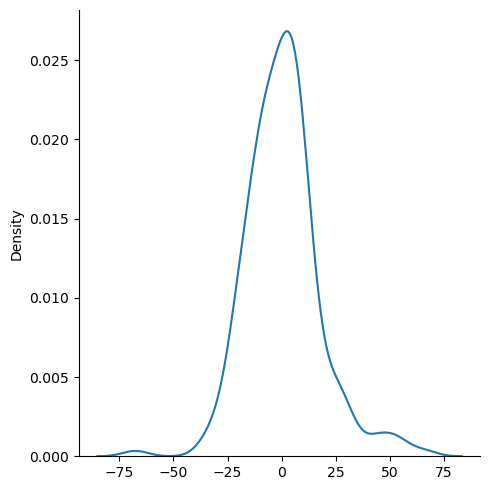

In [74]:
# Residuals plot

sns.displot(residuals, kind='kde')

In [75]:
# Its a normal distribution of residuals that model is performing well.

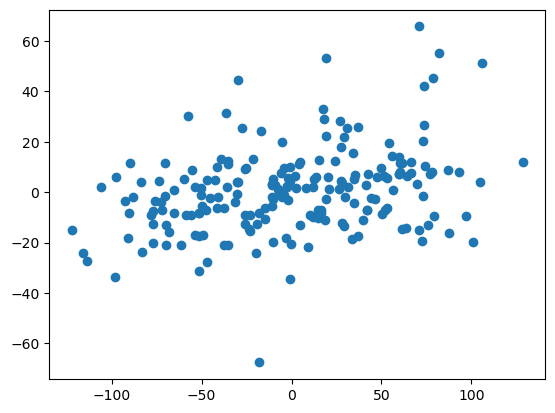

In [76]:
# scatter plot with respect to prediction and residuals

plt.scatter(reg_predict, residuals)

In [77]:
# It is uniformly distributed that model is performing well.

In [78]:
# Adjusted R2 score = 1 - [(1-R2)*(n-1)/(n-k-1)]

1 - (1-r2score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9208984865099434

In [79]:
df.head(3)

,Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Formulation Duration (hrs),Compression Strength MPa
0,0.076266,-1.185002,201.66,0.017638,1.330671,79.89
1,0.567247,0.940023,175.99,-0.912828,-1.517225,59.80
2,-1.797172,0.164717,295.23,-0.340220,0.660953,77.86


### Make predictions on the new data

In [80]:
new_data = df.iloc[1:2,:-1].values
scaled_data = scaler.transform(new_data) # transformation needed

new_predictions = RFR_model.predict(scaled_data)

print("Predicted 'Compression Strength (MPa)': ", new_predictions)


Predicted 'Compression Strength (MPa)':  [24.15279958]


C:\Users\singhm\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Pickling the Model File for Deployment

In [81]:
pickle.dump(RFR_model, open('regmodel.pkl', 'wb'))

In [82]:
pickle_model = pickle.load(open('regmodel.pkl', 'rb'))

In [83]:
pickle_model.predict(scaled_data)

array([24.15279958])